In [39]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [24]:
df = pd.read_csv("creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape 

(284807, 31)

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df=df.drop('Time',axis=1)

In [9]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [10]:
df['Class'].unique()

array([0, 1])

In [11]:
df.duplicated().any()

np.True_

In [12]:
df[df.duplicated()]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284708,2.018105,0.073226,-1.615154,0.351058,0.333905,-0.676284,0.050474,-0.071028,0.302728,-0.193920,...,-0.306646,-0.841768,0.356773,0.655112,-0.331463,0.144352,-0.069820,-0.039845,1.98,0
284751,2.050734,-0.364010,-2.542843,-0.729357,2.388455,3.318015,-0.479138,0.791559,0.403374,0.093232,...,-0.293363,-0.834802,0.381740,0.698179,-0.264798,0.219275,-0.052131,-0.066940,0.89,0
284775,1.955547,-0.724606,-1.706511,-0.611145,1.710907,3.914215,-1.248690,1.054133,1.314064,-0.150553,...,0.193605,0.690196,0.155951,0.726775,-0.061219,-0.192666,0.060347,-0.042323,12.99,0
284785,0.032887,0.545338,-1.185844,-1.729828,2.932315,3.401529,0.337434,0.925377,-0.165663,-0.386953,...,-0.266113,-0.716336,0.108519,0.688519,-0.460220,0.161939,0.265368,0.090245,1.79,0


In [13]:
df.drop_duplicates(keep ='first',inplace=True)

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,...,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000
mean,-0.037460,-0.002430,0.025520,-0.004359,-0.010660,-0.014206,0.008586,-0.005698,-0.012363,0.003114,...,0.002579,0.005827,-0.001941,-0.006868,-0.004812,-0.000240,0.001921,0.000904,90.578380,0.001716
std,1.952522,1.667260,1.507538,1.424323,1.378117,1.313213,1.240348,1.191596,1.100108,1.087025,...,0.733089,0.726378,0.631451,0.605550,0.524175,0.484139,0.401271,0.332649,253.213954,0.041388
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,-0.941105,-0.614040,-0.843168,-0.862847,-0.700192,-0.765861,-0.552047,-0.209618,-0.659904,-0.538968,...,-0.225021,-0.532173,-0.165440,-0.361062,-0.323597,-0.328290,-0.071729,-0.052654,6.300000,0.000000
50%,-0.059659,0.070249,0.200736,-0.035098,-0.060556,-0.270931,0.044848,0.022980,-0.064724,-0.091752,...,-0.025637,0.013397,-0.013655,0.037569,0.009909,-0.056667,0.002615,0.011788,23.740000,0.000000
75%,1.294471,0.819067,1.048461,0.753943,0.604521,0.387704,0.583885,0.322319,0.593098,0.470702,...,0.189118,0.534272,0.145482,0.432931,0.347151,0.244196,0.094730,0.081355,79.910000,0.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [16]:
len(df[df["Class"]==0])#0== not fraund

275190

In [17]:
len(df[df["Class"]==1])#1==farud

473

In [18]:
df['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

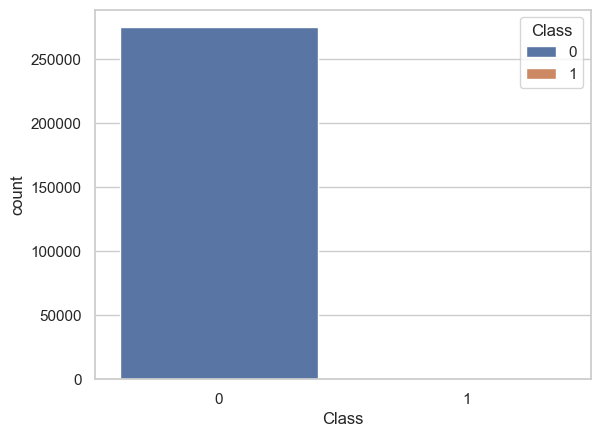

In [19]:
sns.countplot(x=df['Class'],hue=df['Class'])

In [20]:
x=df.drop('Class',axis=1)
y=df['Class']

In [29]:
legit = df[df.Class ==0]
fraud = df[df.Class==1]

print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [30]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [31]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [32]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [35]:
legit_sample = legit.sample(492)
new_df  = pd.concat([legit_sample , fraud], axis = 0 )
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
103393,68631.0,-0.870201,0.274711,-0.714710,0.577091,2.996033,3.453278,0.833332,0.467247,-0.944097,...,-0.138056,-0.129628,0.294247,0.913596,0.412294,-0.126839,-0.026262,-0.175542,119.23,0
216514,140511.0,1.858433,-0.672676,0.130343,0.556958,-1.160013,-0.234483,-0.977212,0.230825,1.246429,...,0.083037,0.233873,0.305952,0.050855,-0.635288,0.143940,-0.009049,-0.040775,36.90,0
198753,132634.0,2.083212,-0.950528,-1.175400,-0.886553,-0.503145,-0.529664,-0.493946,-0.241014,-0.343418,...,0.232909,0.611662,0.109174,0.658247,-0.025923,-0.195374,-0.024080,-0.038244,75.30,0
215972,140301.0,-0.924959,0.679514,3.337140,4.749312,-0.601107,2.568851,-0.857342,0.766708,-0.158682,...,0.054890,0.668827,-0.303030,0.641459,0.173640,0.642696,0.331952,0.180353,64.92,0
117144,74555.0,1.338897,-0.640646,0.567352,-0.746873,-1.126142,-0.368063,-0.796484,0.020185,-0.867089,...,-0.344525,-0.561866,0.049438,0.033322,0.091070,0.992019,-0.046436,0.002767,15.90,0


In [37]:
new_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [36]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,99233.042683,-0.071901,-0.149299,-0.040035,0.004580,0.118773,-0.079550,-0.029381,0.008372,-0.058328,...,0.023097,0.010551,0.044664,0.018612,-0.006203,0.009034,0.051411,0.018067,-0.024682,86.128984
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [38]:
x=new_df.drop(columns='Class')
y= new_df['Class']
print(x)
print(y)

            Time        V1        V2        V3        V4        V5        V6  \
103393   68631.0 -0.870201  0.274711 -0.714710  0.577091  2.996033  3.453278   
216514  140511.0  1.858433 -0.672676  0.130343  0.556958 -1.160013 -0.234483   
198753  132634.0  2.083212 -0.950528 -1.175400 -0.886553 -0.503145 -0.529664   
215972  140301.0 -0.924959  0.679514  3.337140  4.749312 -0.601107  2.568851   
117144   74555.0  1.338897 -0.640646  0.567352 -0.746873 -1.126142 -0.368063   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [40]:
x_train , x_test , y_train , y_test = train_test_split(x ,y , test_size=0.2 , random_state= 42)

In [41]:
model = LogisticRegression()
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


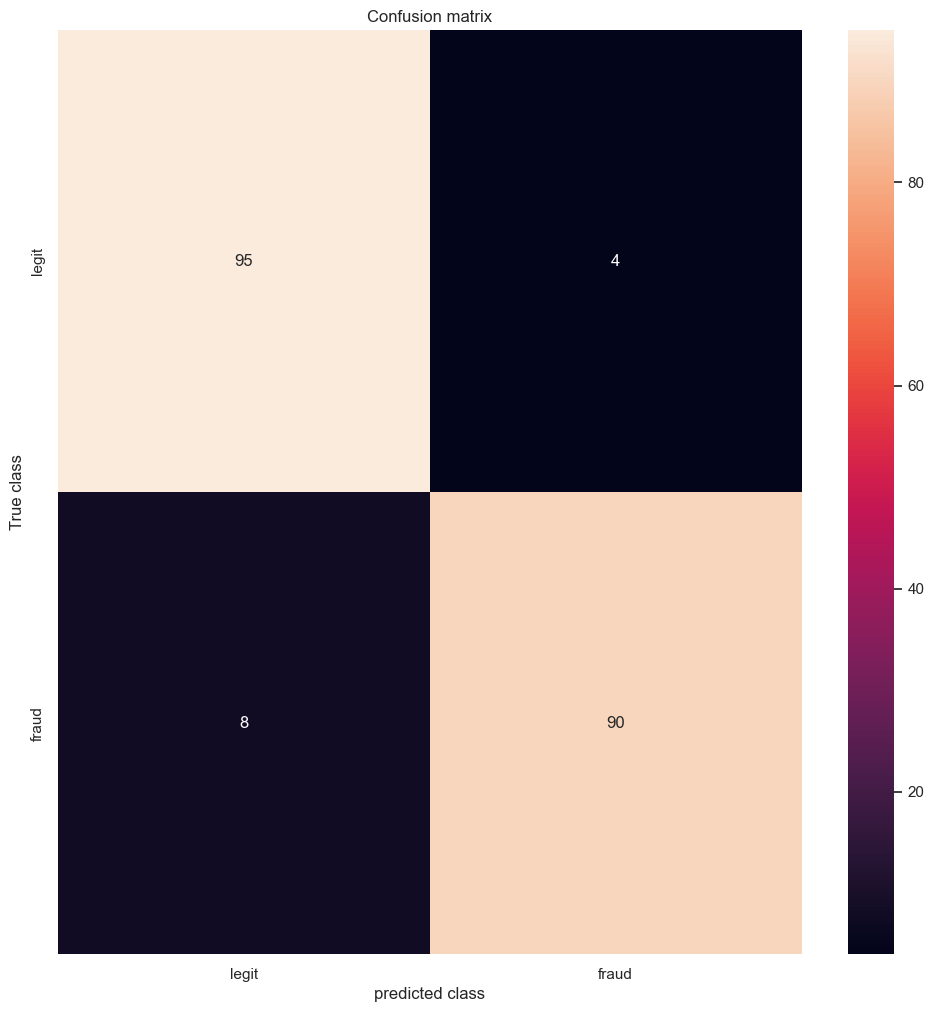

In [43]:
y_pred_log =model.predict(x_test)
LABELs=['legit','fraud']
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test , y_pred_log)
plt.figure(figsize=(12,12))
sns.heatmap(conf_matrix, xticklabels=LABELs, yticklabels=LABELs, annot=True, fmt='d')
plt.title("Confusion matrix")
plt.ylabel("True class")
plt.xlabel("predicted class")
plt.show()

In [49]:
x_train_prediction=model.predict(x_train)
training_data_accuracy= accuracy_score(x_train_prediction,y_train)
print(training_data_accuracy)


0.940279542566709


In [47]:
x_test_prediction=model.predict(x_test)
testing_data_accuracy =accuracy_score(x_test_prediction, y_test)
testing_data_accuracy 
x_test_prediction


array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1])